In [16]:
import matplotlib.style
matplotlib.style.use('classic')
#import matplotlib
#matplotlib.use('pdf')
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import stead_results as ss
from scipy.interpolate import griddata

In [17]:
files = glob("Results/out*")
points = list()

for a_file in files:
    x_data = np.loadtxt(a_file)
    x = x_data[:,1:-2]
    N = int((x.shape[1])/2)
    t = x_data[:,0]

    Mag_r, Re_r, Im_r, V_inf = ss.get_result(a_file, 7000, 0.1)

    phases = x[:,0:N]

    phase_velocity = x[:,N:]

    points.append( [(phases[0, 0]), (phases[0, 1]), Re_r, Mag_r, np.sqrt(V_inf)] )

    # if ((np.mean(Re_r[-1000:]) > 0.1) or (np.mean(Re_r[-1000:]) < -0.1)):
    # 	print([(phases[0, 0]), (phases[0, 1]), np.mean(Re_r[-1000:]), np.mean(Mag_r[-1000:])])

points = np.array(points)
x_ax = points[:, 0]
y_ax = points[:, 1]
X_space, Y_space = np.meshgrid( np.sort(np.unique(x_ax)), np.sort(np.unique(y_ax)) ) 

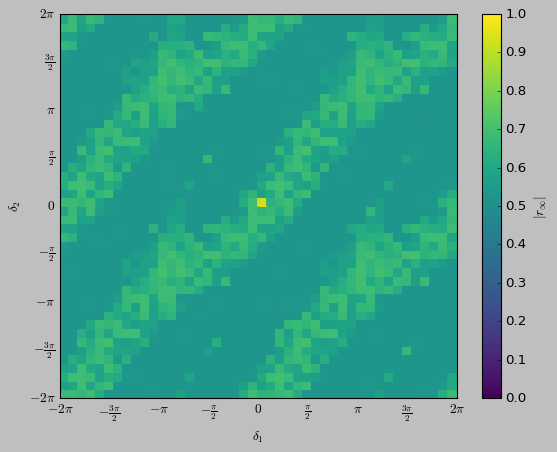

In [20]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
values = points[:,3]
Z_space = griddata(points[:,0:2], values, (X_space, Y_space), method ='nearest' )
im = ax1.pcolormesh( X_space, Y_space, Z_space, cmap = plt.cm.viridis, vmin = 0, vmax = 1, edgecolors = 'face')
cbar = fig.colorbar(im, ax = ax1)
cbar.set_label(r'$|r_{\infty}|$')

ax1.set_xlabel(r'$\delta_1$')
ax1.set_xticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_xticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_yticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_yticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_ylabel(r'$\delta_2$')
ax1.set_xlim([-2*np.pi, 2*np.pi])
ax1.set_ylim([-2*np.pi, 2*np.pi])
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.savefig('Images/var_initstate_triangular_rinf.pdf')
plt.show()

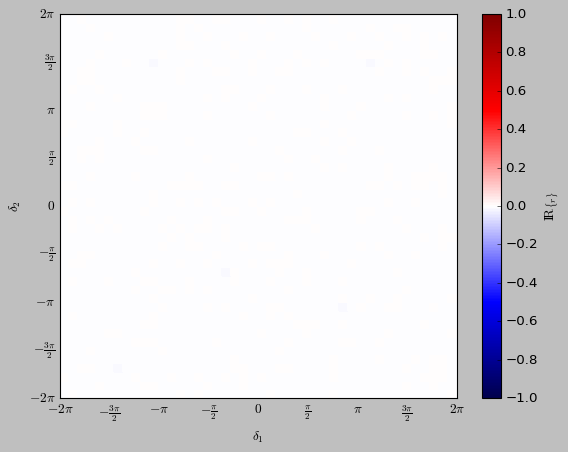

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

values = points[:,2]
Z_space = griddata(points[:,0:2], values, (X_space, Y_space), method ='nearest' )
im = ax1.pcolormesh( X_space, Y_space, Z_space, cmap = plt.cm.seismic, vmin = -1, vmax = 1, edgecolors = 'face')
cbar = fig.colorbar(im, ax = ax1)
cbar.set_label(r'${\rm I\!R}_{ \{ r \} }$')
ax1.set_xlabel(r'$\delta_1$')
ax1.set_xticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_xticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_yticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_yticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_ylabel(r'$\delta_2$')
ax1.set_xlim([-2*np.pi, 2*np.pi])
ax1.set_ylim([-2*np.pi, 2*np.pi])
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 
plt.savefig('Images/var_initstate_triangular_rreal.pdf')
plt.show()

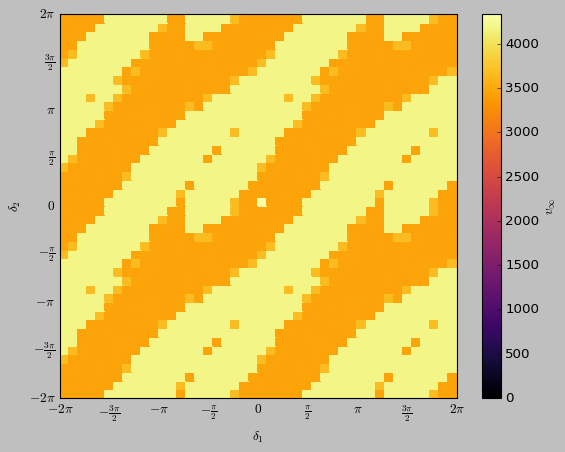

In [22]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
values = points[:,4]
Z_space = griddata(points[:,0:2], values, (X_space, Y_space), method ='nearest' )
im = ax1.pcolormesh( X_space, Y_space, Z_space, cmap = plt.cm.inferno, vmin = 0, vmax = np.max(values), edgecolors = 'face')
cbar = fig.colorbar(im, ax = ax1)
cbar.set_label(r'$v_{\infty}$')
ax1.set_xlabel(r'$\delta_1$')
ax1.set_xticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_xticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_yticks([-2*np.pi, -1.5*np.pi, -np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax1.set_yticklabels([r"$-2\pi$", r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$",
    "$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax1.set_ylabel(r'$\delta_2$')

ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none') 

ax1.set_xlim([-2*np.pi, 2*np.pi])
ax1.set_ylim([-2*np.pi, 2*np.pi])
plt.savefig('Images/var_initstate_triangular_vinf.pdf')
plt.show()